# How to check the stationarity? 
&nbsp;
![Stationarity](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*xdblkZyg6YmmReAkZHUksw.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Filter out the warning by category
warnings.filterwarnings("ignore")


C:\Users\DEKI_\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('flights')
df['Date'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index(df['Date'],inplace=True)
df.drop(columns=['year', 'month', 'Date'], inplace=True)
df.head()

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.isna().sum()

passengers    0
dtype: int64

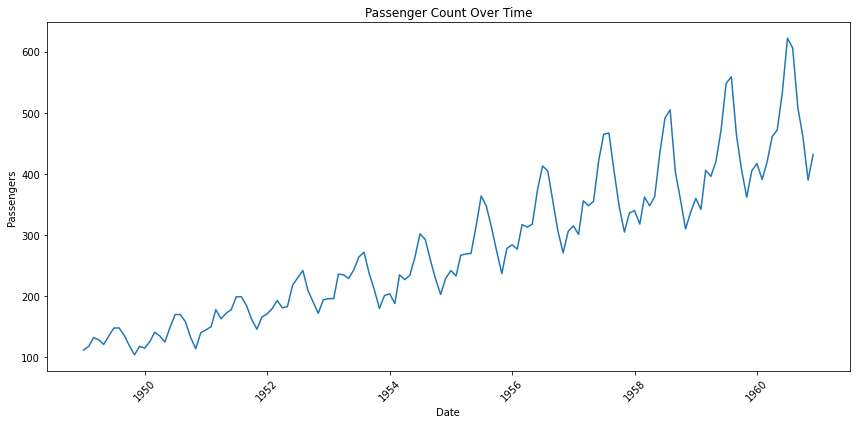

In [5]:
# Assuming your DataFrame is named 'df' and 'Date' is a datetime column
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a line plot using Seaborn
sns.lineplot(x='Date', y='passengers', data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Count Over Time')

plt.tight_layout()
plt.show()

# Using ADF: Augmented Dickey-Fuller test: 

__Rules:__ 
- If test Statistics < critical values & p-value < 0,05 then reject the null hypothesis. 
- Reject H0 hypothesis meaning it's stationary,  it does not have a time-dependent structure.


https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

In [69]:
np.sqrt(np.log(df['passengers'])) - df['log_sqrt'].shift()


Date
1949-01-01         NaN
1949-02-01    0.011979
1949-03-01    0.025517
1949-04-01   -0.005208
1949-05-01   -0.014569
                ...   
1960-08-01   -0.005143
1960-09-01   -0.035088
1960-10-01   -0.019523
1960-11-01   -0.034000
1960-12-01    0.020848
Length: 144, dtype: float64

In [6]:
# Feature engineering for time series.

df['shift'] = df.passengers.shift()
df['shift12'] = df.passengers.shift(12)
df['shiftDiff'] = df.passengers - df['shift']
df['shiftDiff12'] = df.passengers - df['shift12']
df['log'] = np.log(df['passengers'])
df['cbrt'] = np.cbrt(df['passengers'])
df['sqrt'] = np.sqrt(df['passengers'])
df['log_cbrt'] = np.cbrt(df['log'])
df['log_sqrt'] = np.sqrt(df['log'])
df['logSqrtShiftDiff'] = df['log_sqrt'] - df['log_sqrt'].shift()

df.tail()

,passengers,shift,shift12,shiftDiff,shiftDiff12,log,cbrt,sqrt,log_cbrt,log_sqrt,logSqrtShiftDiff
Date,,,,,,,,,,,
1960-08-01,606,622.0,559.0,-16.0,47.0,6.406880,8.462348,24.617067,1.857301,2.531182,-0.005143
1960-09-01,508,606.0,463.0,-98.0,45.0,6.230481,7.979112,22.538855,1.840096,2.496093,-0.035088
1960-10-01,461,508.0,407.0,-47.0,54.0,6.133398,7.725032,21.470911,1.830489,2.476570,-0.019523
1960-11-01,390,461.0,362.0,-71.0,28.0,5.966147,7.306144,19.748418,1.813697,2.442570,-0.034000
1960-12-01,432,390.0,405.0,42.0,27.0,6.068426,7.559526,20.784610,1.824002,2.463417,0.020848


In [7]:

def test_stationarity_adf(dataframe, column_name):
    """
    Test the stationarity of a time series and visualize its components.

    Parameters:
        - dataframe: DataFrame containing the time series data.
        - column_name: The name of the column in the DataFrame to be tested and visualized.

    Returns:
        None (displays plots and test results).
    """
    
    # Calculate rolling mean and standard deviation
    dataframe['rollMean'] = dataframe[column_name].rolling(window=12).mean()
    dataframe['rollStd'] = dataframe[column_name].rolling(window=12).std()
    
    # Perform Augmented Dickey-Fuller test
    result = adfuller(dataframe[column_name], autolag='AIC')
    
    # Extract the test statistics and p-values
    test_statistic, p_value, lags, nobs, critical_values, icbest = result
    
    # Set the significance level (e.g., 0.05)
    significance_level = 0.05
    
    
    # Display Augmented Dickey-Fuller test results
    print("Augmented Dickey-Fuller Test Results:")
    print("-" *40)
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")
    print(f"Lags Used: {lags}")
    print(f"Number of Observations: {nobs}")
    print("-" *40)
    print("Critical Values:")
    
    
    # Check if the time series is stationary
    for key, value in critical_values.items():
        print(f"{key}: {value}")
    print("-" * 40)
    
    # Check if the time series is stationary
    if test_statistic < max(critical_values.values()) and p_value < significance_level:
        print('Reject the null hypothesis.The time series is stationary.')
    else:
        print('Fail to reject the null hypothesis. The time series is non-stationary.')
        
    
    # Set the color palette
    sns.set_palette("husl")
    
    # Set the figure size
    plt.figure(figsize=(12, 6))
    
    
    # Create the first y-axis for 'column_name' and 'Rolling Mean'
    ax1 = sns.lineplot(x='Date', y=column_name, data=dataframe, label=f'{column_name}', color='BLUE')
    ax1 = sns.lineplot(x='Date', y='rollMean', data=dataframe, label='Rolling Mean', color= 'orange')
    
    # Create the second y-axis for 'Rolling Std'
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='Date', y='rollStd', data=dataframe, label='Rolling Std', color='#32CD32')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set axis labels and title
    plt.xlabel('Date')
    plt.ylabel('Rollin Std')
    plt.title(f'{column_name}, Rolling 12 months Mean & Std')

    # Move the legend to the upper right corner
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.5)

  
    plt.tight_layout()
    plt.show()

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: 0.8153688792060482
P-value: 0.991880243437641
Lags Used: 13
Number of Observations: 130
----------------------------------------
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
----------------------------------------
Fail to reject the null hypothesis. The time series is non-stationary.


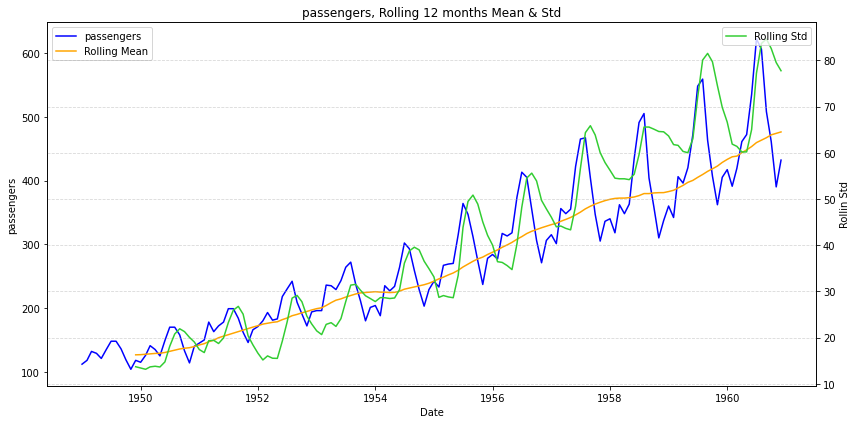

In [8]:
test_stationarity_adf(df,'passengers')

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -2.657779306486214
P-value: 0.08163354127638928
Lags Used: 12
Number of Observations: 119
----------------------------------------
Critical Values:
1%: -3.4865346059036564
5%: -2.8861509858476264
10%: -2.579896092790057
----------------------------------------
Fail to reject the null hypothesis. The time series is non-stationary.


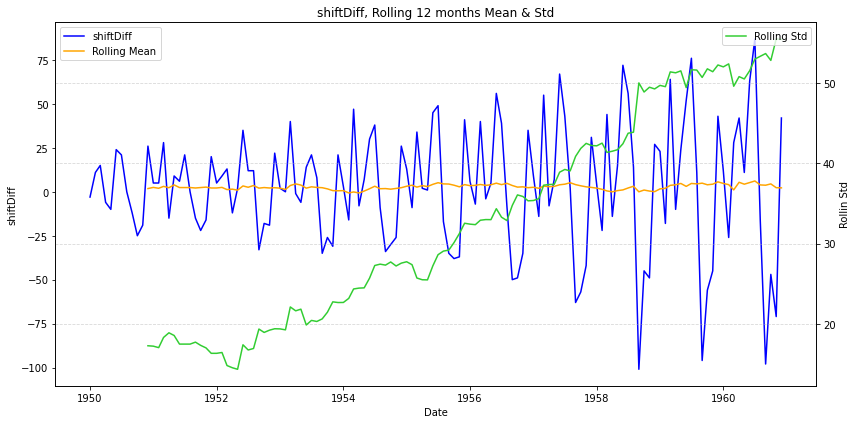

In [9]:
test_stationarity_adf(df.dropna(), 'shiftDiff')

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -3.383020726492481
P-value: 0.011551493085514952
Lags Used: 1
Number of Observations: 130
----------------------------------------
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
----------------------------------------
Reject the null hypothesis.The time series is stationary.


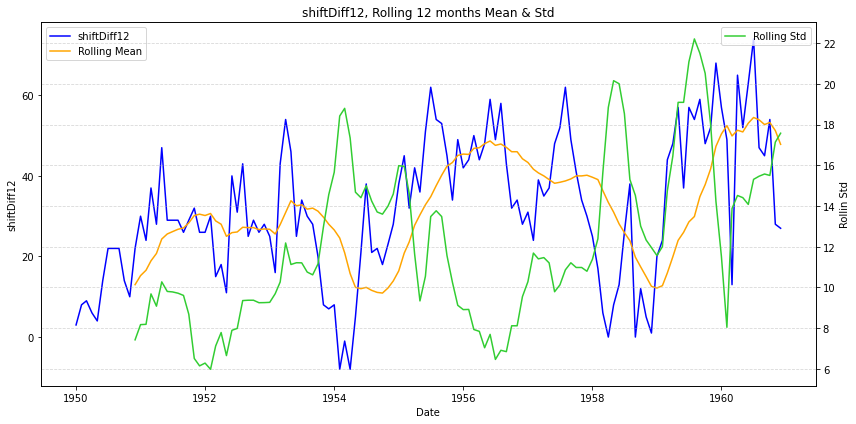

In [10]:
test_stationarity_adf(df.dropna(), 'shiftDiff12')

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -1.7170170891069607
P-value: 0.42236677477039125
Lags Used: 13
Number of Observations: 130
----------------------------------------
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
----------------------------------------
Fail to reject the null hypothesis. The time series is non-stationary.


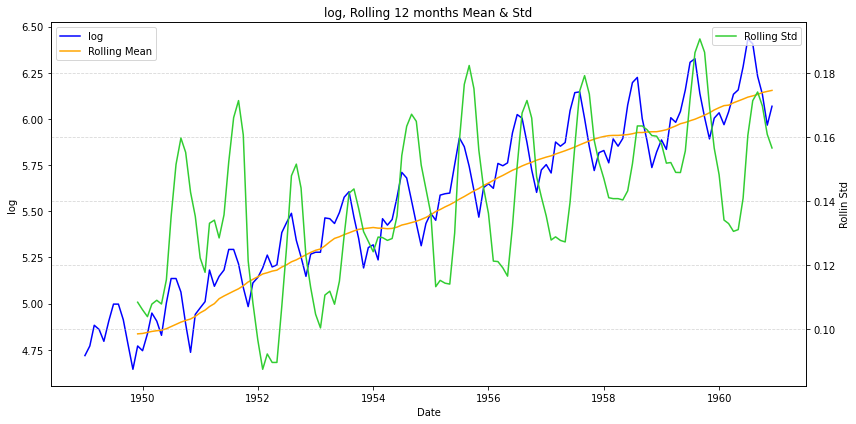

In [11]:
test_stationarity_adf(df,'log')

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -0.34585376771567355
P-value: 0.918754321761837
Lags Used: 13
Number of Observations: 130
----------------------------------------
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
----------------------------------------
Fail to reject the null hypothesis. The time series is non-stationary.


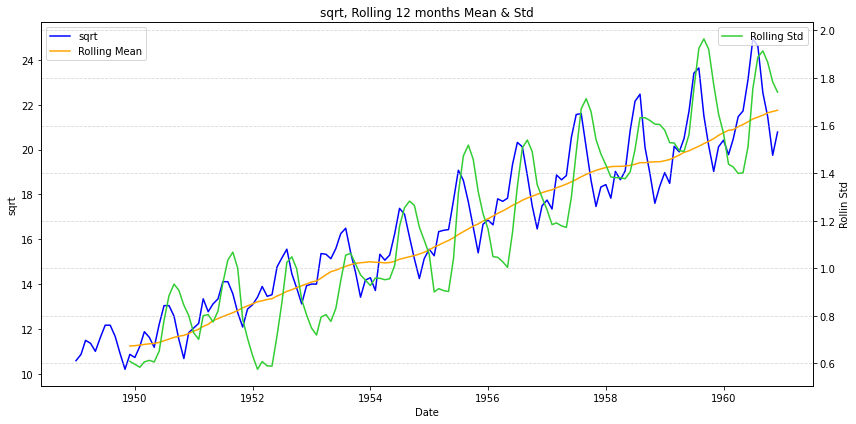

In [12]:
test_stationarity_adf(df,'sqrt')

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -0.810035072218635
P-value: 0.8161565539700508
Lags Used: 13
Number of Observations: 130
----------------------------------------
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
----------------------------------------
Fail to reject the null hypothesis. The time series is non-stationary.


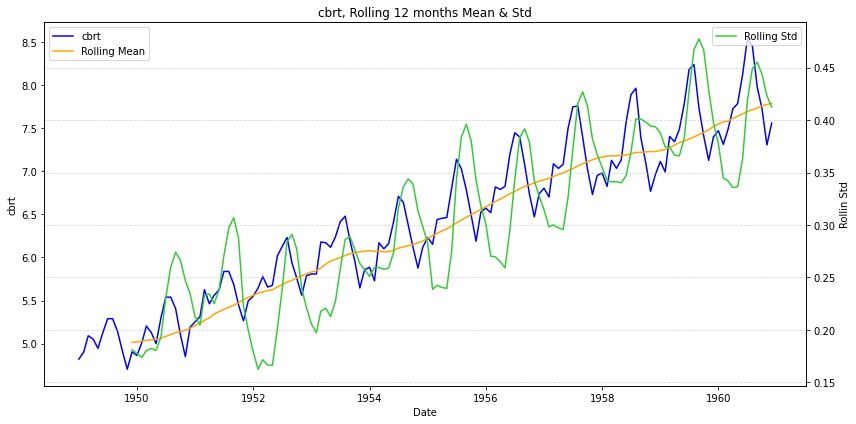

In [13]:
test_stationarity_adf(df,'cbrt')

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -1.9425283300798986
P-value: 0.31232635444964785
Lags Used: 13
Number of Observations: 130
----------------------------------------
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
----------------------------------------
Fail to reject the null hypothesis. The time series is non-stationary.


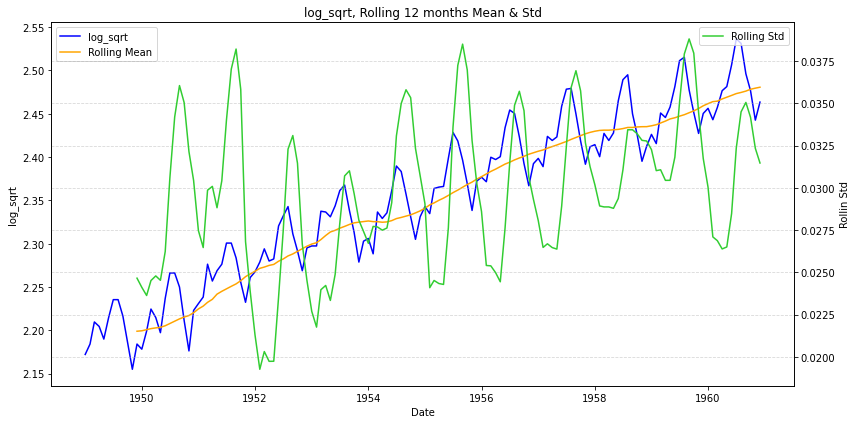

In [14]:
test_stationarity_adf(df,'log_sqrt')

Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -2.0150660268253704
P-value: 0.2800064911538844
Lags Used: 13
Number of Observations: 130
----------------------------------------
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
----------------------------------------
Fail to reject the null hypothesis. The time series is non-stationary.


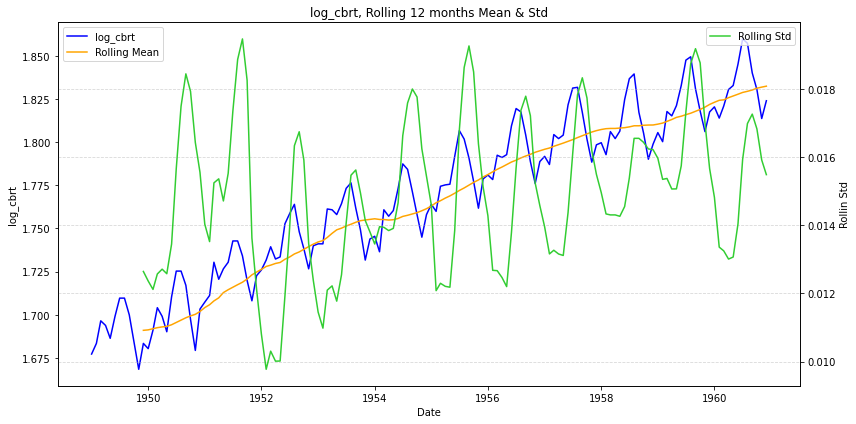

In [15]:
test_stationarity_adf(df,'log_cbrt')

In [16]:
df.dropna()

,passengers,shift,shift12,shiftDiff,shiftDiff12,log,cbrt,sqrt,log_cbrt,log_sqrt,logSqrtShiftDiff,rollMean,rollStd
Date,,,,,,,,,,,,,
1950-01-01,115,118.0,112.0,-3.0,3.0,4.744932,4.862944,10.723805,1.680390,2.178287,-0.005903,1.691267,0.012362
1950-02-01,126,115.0,118.0,11.0,8.0,4.836282,5.013298,11.224972,1.691105,2.199155,0.020868,1.691907,0.012116
1950-03-01,141,126.0,132.0,15.0,9.0,4.948760,5.204828,11.874342,1.704115,2.224581,0.025426,1.692540,0.012569
1950-04-01,135,141.0,129.0,-6.0,6.0,4.905275,5.129928,11.618950,1.699109,2.214785,-0.009795,1.692979,0.012710
1950-05-01,125,135.0,121.0,-10.0,4.0,4.828314,5.000000,11.180340,1.690176,2.197342,-0.017443,1.693296,0.012577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,559.0,-16.0,47.0,6.406880,8.462348,24.617067,1.857301,2.531182,-0.005143,1.829460,0.016979
1960-09-01,508,606.0,463.0,-98.0,45.0,6.230481,7.979112,22.538855,1.840096,2.496093,-0.035088,1.830225,0.017255
1960-10-01,461,508.0,407.0,-47.0,54.0,6.133398,7.725032,21.470911,1.830489,2.476570,-0.019523,1.831265,0.016823


Augmented Dickey-Fuller Test Results:
----------------------------------------
Test Statistic: -3.071912217950007
P-value: 0.028702853198309033
Lags Used: 13
Number of Observations: 118
----------------------------------------
Critical Values:
1%: -3.4870216863700767
5%: -2.8863625166643136
10%: -2.580009026141913
----------------------------------------
Reject the null hypothesis.The time series is stationary.


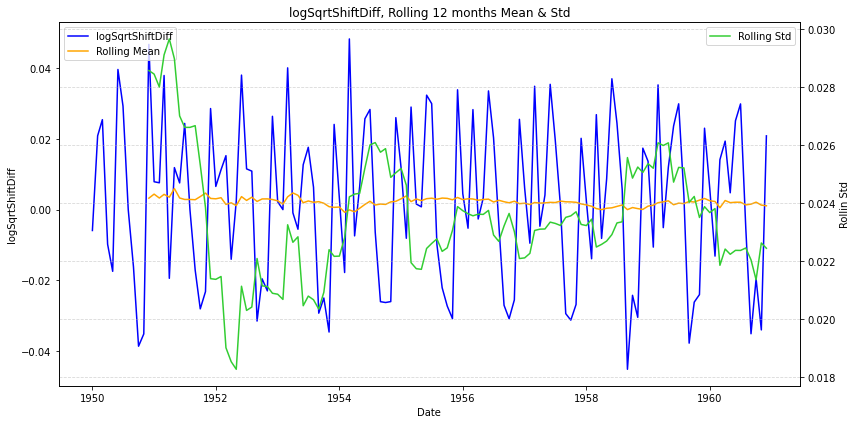

In [17]:
test_stationarity_adf(df.dropna(),'logSqrtShiftDiff')

## Using KPSS:  Kwiatkowski-Phillips-Schmidt-Shin test:¶
__Rules:__

- If Test Statistics < critical values & p-value < 0,05 then Fail to reject the null hypothesis. The time series is stationary.
- Fail to reject H0 hypothesis meaning it's stationary, it does not have a time-dependent structure.

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

In [18]:
def test_stationarity_kpss(dataframe, column_name):
    """
    Test the stationarity of a time series using the KPSS test and visualize its components.

    Parameters:
        - dataframe: DataFrame containing the time series data.
        - column_name: The name of the column in the DataFrame to be tested and visualized.

    Returns:
        None (displays plots and test results).
    """
    
    # Calculate rolling mean and standard deviation
    dataframe['rollMean'] = dataframe[column_name].rolling(window=12).mean()
    dataframe['rollStd'] = dataframe[column_name].rolling(window=12).std()
    
    # Perform KPSS test
    result = kpss(dataframe[column_name], regression='c')
    
    # Extract the test statistics and p-values
    test_statistic, p_value, lags, critical_values = result
    
    # Set the significance level (e.g., 0.05)
    significance_level = 0.05
    
    # Display KPSS test results
    print("KPSS Test Results:")
    print("-" * 40)
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")
    print(f"Lags Used: {lags}")
    print("-" * 40)
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"{key}: {value}")
    print("-" * 40)
    
    # Check if the time series is stationary
    if test_statistic < max(critical_values.values()) and p_value < significance_level:
        print('Fail to reject the null hypothesis. The time series is stationary.')
    else:
        print('Reject the null hypothesis. The time series is non-stationary.')
    
    # Ensure that the data columns have the same length
    if len(dataframe) != len(dataframe['rollMean']) or len(dataframe) != len(dataframe['rollStd']):
        raise ValueError("Length of data and rolling statistics do not match.")
    
    # Set the color palette
    sns.set_palette("husl")
    
    # Set the figure size
    plt.figure(figsize=(12, 6))
    
    
    # Create the first y-axis for 'column_name' and 'Rolling Mean'
    ax1 = sns.lineplot(x='Date', y=column_name, data=dataframe, label=f'{column_name}', color='BLUE')
    ax1 = sns.lineplot(x='Date', y='rollMean', data=dataframe, label='Rolling Mean', color= 'orange')
    
    # Create the second y-axis for 'Rolling Std'
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='Date', y='rollStd', data=dataframe, label='Rolling Std', color='#32CD32')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set axis labels and title
    plt.xlabel('Date')
    plt.ylabel('Rollin Std')
    plt.title(f'{column_name}, Rolling 12 months Mean & Std')

    # Move the legend to the upper right corner
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.5)

    # Shade the region where the time series is stationary
    if test_statistic < max(critical_values.values()) and p_value < significance_level:
        plt.axvspan(dataframe['Date'].iloc[0], dataframe['Date'].iloc[-1], color='green', alpha=0.1)

    plt.tight_layout()
    plt.show()
# Usage:
# test_stationarity_kpss(your_dataframe, 'passengers')


In [19]:
df.columns

Index(['passengers', 'shift', 'shift12', 'shiftDiff', 'shiftDiff12', 'log',
       'cbrt', 'sqrt', 'log_cbrt', 'log_sqrt', 'logSqrtShiftDiff', 'rollMean',
       'rollStd'],
      dtype='object')

KPSS Test Results:
----------------------------------------
Test Statistic: 1.0521750110135095
P-value: 0.01
Lags Used: 14
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


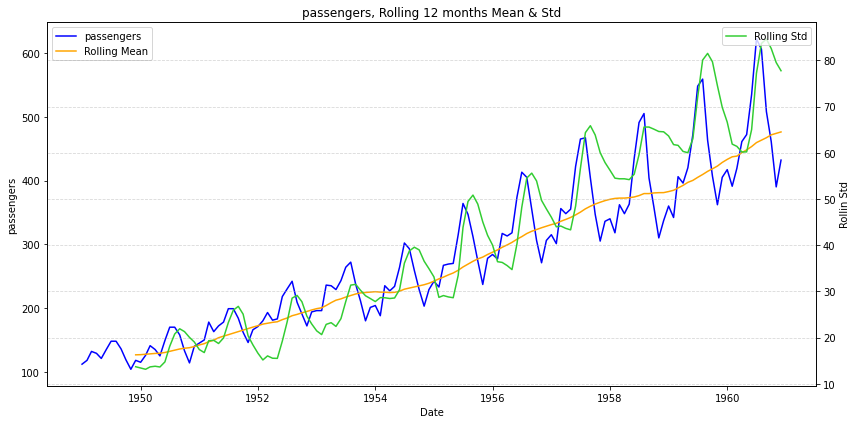

In [20]:
test_stationarity_kpss(df, 'passengers')

KPSS Test Results:
----------------------------------------
Test Statistic: 0.07629302148406154
P-value: 0.1
Lags Used: 13
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


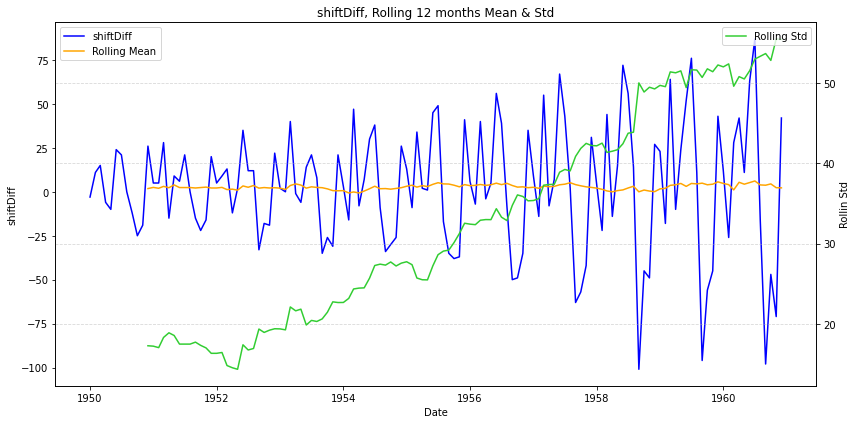

In [21]:
test_stationarity_kpss(df.dropna(), 'shiftDiff')

KPSS Test Results:
----------------------------------------
Test Statistic: 0.3824670756642748
P-value: 0.08471246738608845
Lags Used: 13
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


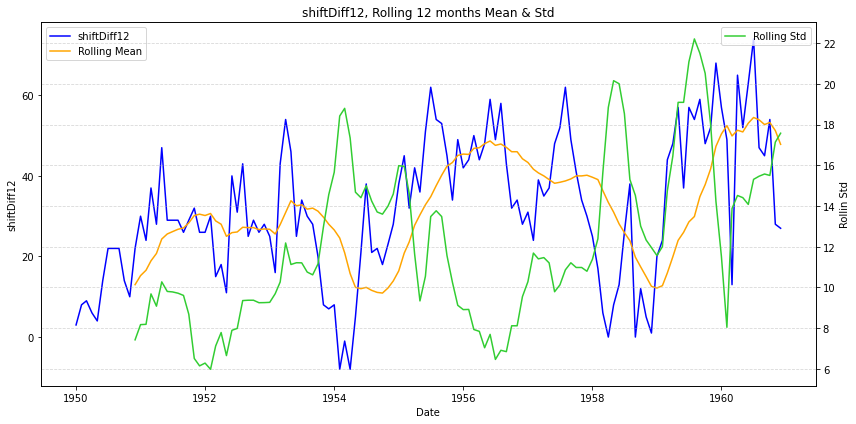

In [22]:
test_stationarity_kpss(df.dropna(), 'shiftDiff12')

KPSS Test Results:
----------------------------------------
Test Statistic: 1.053981419846458
P-value: 0.01
Lags Used: 14
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


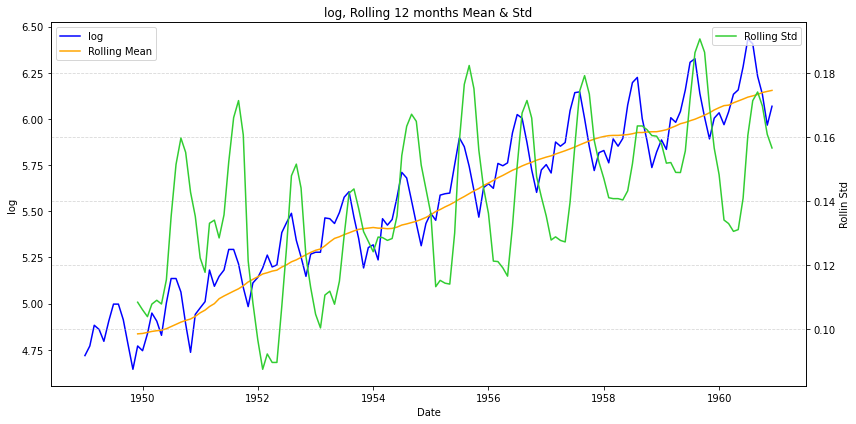

In [23]:
test_stationarity_kpss(df, 'log')

KPSS Test Results:
----------------------------------------
Test Statistic: 1.0589453300371585
P-value: 0.01
Lags Used: 14
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


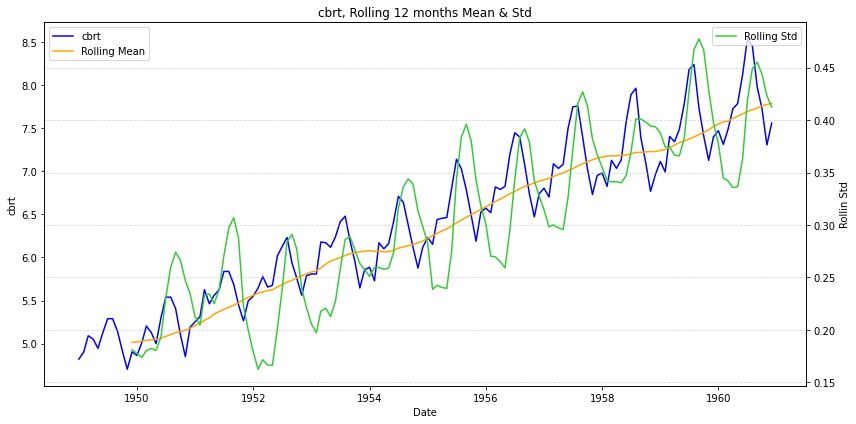

In [24]:
test_stationarity_kpss(df, 'cbrt')

KPSS Test Results:
----------------------------------------
Test Statistic: 1.0592902108428068
P-value: 0.01
Lags Used: 14
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


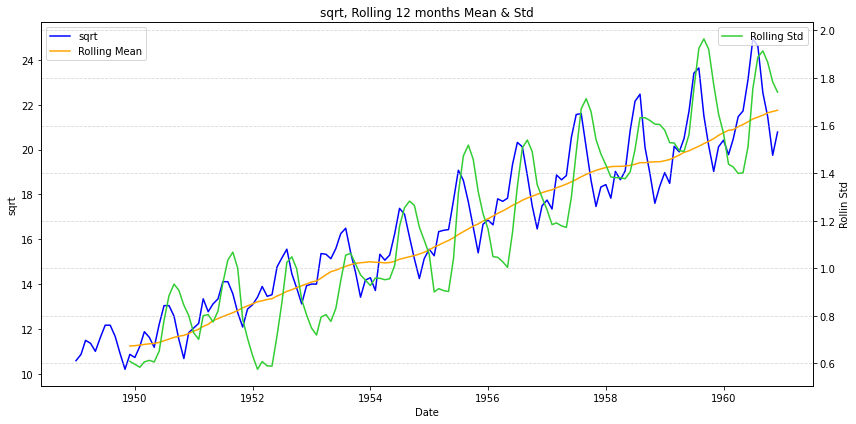

In [25]:
test_stationarity_kpss(df, 'sqrt')

KPSS Test Results:
----------------------------------------
Test Statistic: 1.0507508709021958
P-value: 0.01
Lags Used: 14
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


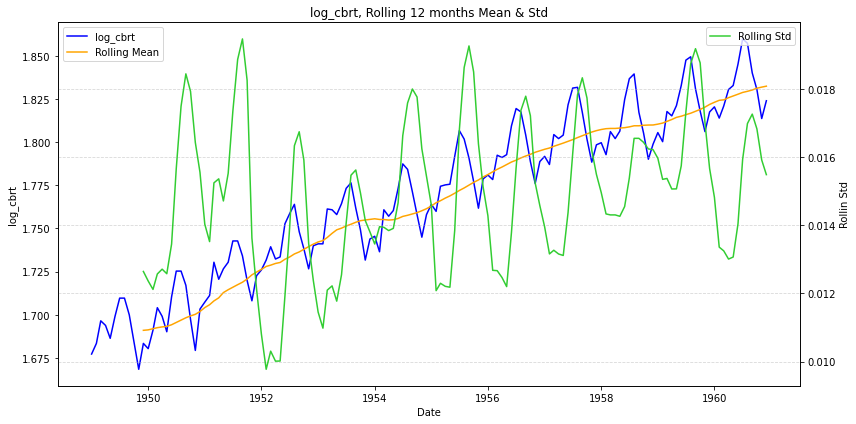

In [26]:
test_stationarity_kpss(df, 'log_cbrt')

KPSS Test Results:
----------------------------------------
Test Statistic: 1.051630229538419
P-value: 0.01
Lags Used: 14
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


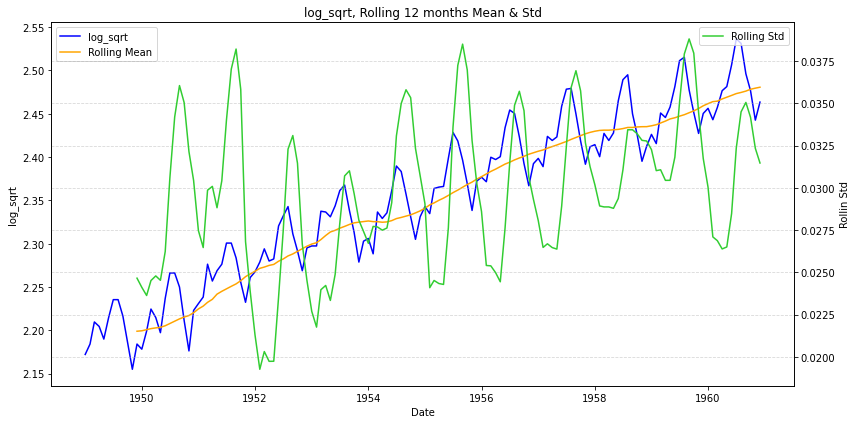

In [27]:
test_stationarity_kpss(df, 'log_sqrt')

KPSS Test Results:
----------------------------------------
Test Statistic: 0.1829998332080813
P-value: 0.1
Lags Used: 13
----------------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
----------------------------------------
Reject the null hypothesis. The time series is non-stationary.


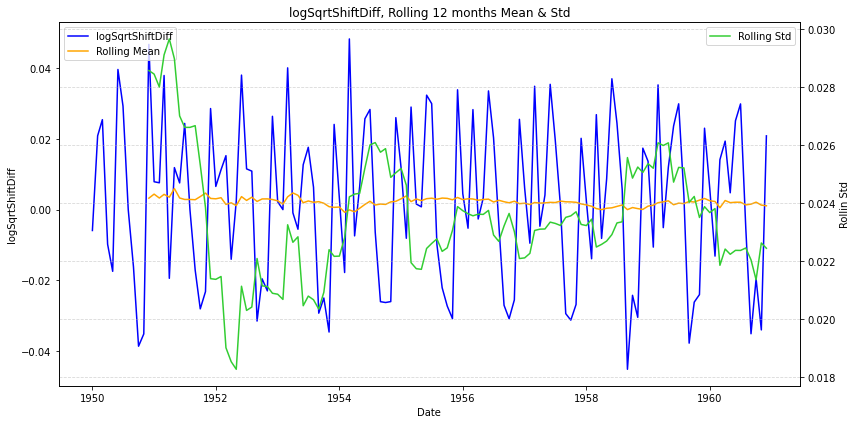

In [28]:
test_stationarity_kpss(df.dropna(),'logSqrtShiftDiff')

In [29]:
df.head()

,passengers,shift,shift12,shiftDiff,shiftDiff12,log,cbrt,sqrt,log_cbrt,log_sqrt,logSqrtShiftDiff,rollMean,rollStd
Date,,,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,4.718499,4.820285,10.583005,1.677263,2.172211,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,6.0,NaN,4.770685,4.904868,10.862780,1.683424,2.184190,0.011979,NaN,NaN
1949-03-01,132,118.0,NaN,14.0,NaN,4.882802,5.091643,11.489125,1.696510,2.209706,0.025517,NaN,NaN
1949-04-01,129,132.0,NaN,-3.0,NaN,4.859812,5.052774,11.357817,1.693843,2.204498,-0.005208,NaN,NaN
1949-05-01,121,129.0,NaN,-8.0,NaN,4.795791,4.946087,11.000000,1.686372,2.189929,-0.014569,NaN,NaN


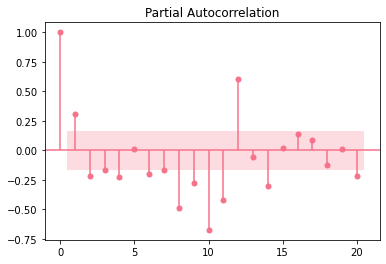

In [30]:
plot_pacf(df['shiftDiff'].dropna(), lags=20);

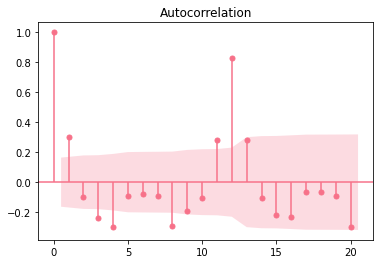

In [31]:
plot_acf(df['shiftDiff'].dropna(), lags=20);

In [32]:
# p=1, q=3, d=1

In [33]:
train = df[:round(len(df)*0.7)]
test = df[round(len(df)*0.7):]

In [34]:
train.tail()

,passengers,shift,shift12,shiftDiff,shiftDiff12,log,cbrt,sqrt,log_cbrt,log_sqrt,logSqrtShiftDiff,rollMean,rollStd
Date,,,,,,,,,,,,,
1957-01-01,315,306.0,284.0,9.0,31.0,5.752573,6.804092,17.748239,1.791791,2.398452,0.006051,2.406728,0.028060
1957-02-01,301,315.0,277.0,-14.0,24.0,5.707110,6.701759,17.349352,1.787058,2.388956,-0.009496,2.408183,0.026476
1957-03-01,356,301.0,317.0,55.0,39.0,5.874931,7.087341,18.867962,1.804406,2.423826,0.034870,2.410187,0.026691
1957-04-01,348,356.0,313.0,-8.0,35.0,5.852202,7.033850,18.654758,1.802076,2.419133,-0.004693,2.412021,0.026467
1957-05-01,355,348.0,318.0,7.0,37.0,5.872118,7.080699,18.841444,1.804118,2.423245,0.004113,2.413923,0.026377


In [35]:
test.head()

,passengers,shift,shift12,shiftDiff,shiftDiff12,log,cbrt,sqrt,log_cbrt,log_sqrt,logSqrtShiftDiff,rollMean,rollStd
Date,,,,,,,,,,,,,
1957-06-01,422,355.0,374.0,67.0,48.0,6.045005,7.500741,20.542639,1.821653,2.458659,0.035414,2.415979,0.028923
1957-07-01,465,422.0,413.0,43.0,52.0,6.142037,7.747311,21.563859,1.831348,2.478313,0.019654,2.417983,0.032436
1957-08-01,467,465.0,405.0,2.0,62.0,6.146329,7.758402,21.610183,1.831774,2.479179,0.000866,2.420391,0.035935
1957-09-01,404,467.0,355.0,-63.0,49.0,6.001415,7.392542,20.099751,1.817263,2.449779,-0.029401,2.422602,0.036930
1957-10-01,347,404.0,306.0,-57.0,41.0,5.849325,7.027106,18.627936,1.801781,2.418538,-0.031241,2.424780,0.035738


In [36]:
model = ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])

In [38]:
df['arimaPred'] = prediction
df.tail()

,passengers,shift,shift12,shiftDiff,shiftDiff12,log,cbrt,sqrt,log_cbrt,log_sqrt,logSqrtShiftDiff,rollMean,rollStd,arimaPred
Date,,,,,,,,,,,,,,
1960-08-01,606,622.0,559.0,-16.0,47.0,6.406880,8.462348,24.617067,1.857301,2.531182,-0.005143,2.474556,0.034496,2.363205
1960-09-01,508,606.0,463.0,-98.0,45.0,6.230481,7.979112,22.538855,1.840096,2.496093,-0.035088,2.476110,0.035054,2.363205
1960-10-01,461,508.0,407.0,-47.0,54.0,6.133398,7.725032,21.470911,1.830489,2.476570,-0.019523,2.478217,0.034175,2.363205
1960-11-01,390,461.0,362.0,-71.0,28.0,5.966147,7.306144,19.748418,1.813697,2.442570,-0.034000,2.479492,0.032338,2.363205
1960-12-01,432,390.0,405.0,42.0,27.0,6.068426,7.559526,20.784610,1.824002,2.463417,0.020848,2.480586,0.031470,2.363205


<AxesSubplot:xlabel='Date', ylabel='passengers'>

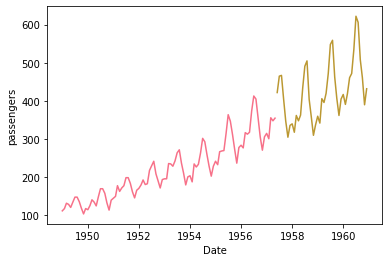

In [39]:
sns.lineplot(data=train, x=train.index, y='passengers')
sns.lineplot(data=test, x=test.index, y='passengers')

<AxesSubplot:xlabel='Date', ylabel='passengers'>

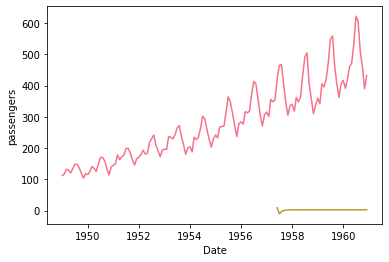

In [40]:
df.dropna()
sns.lineplot(data=df, x=df.index, y='passengers')
sns.lineplot(data=df, x=df.index, y='arimaPred')

In [41]:
from sklearn.metrics import mean_squared_error 

In [42]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

427.60078627707105

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

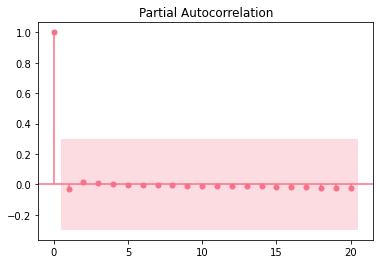

In [44]:
plot_pacf(df['arimaPred'].dropna(), lags=20);

In [45]:
model = SARIMAX(train['passengers'], order=(1,1,3), seasonal_order=(1,1,3,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
df['sarimaxPred'] = prediction


In [46]:
df.tail()

,passengers,shift,shift12,shiftDiff,shiftDiff12,log,cbrt,sqrt,log_cbrt,log_sqrt,logSqrtShiftDiff,rollMean,rollStd,arimaPred,sarimaxPred
Date,,,,,,,,,,,,,,,
1960-08-01,606,622.0,559.0,-16.0,47.0,6.406880,8.462348,24.617067,1.857301,2.531182,-0.005143,2.474556,0.034496,2.363205,599.419162
1960-09-01,508,606.0,463.0,-98.0,45.0,6.230481,7.979112,22.538855,1.840096,2.496093,-0.035088,2.476110,0.035054,2.363205,534.533390
1960-10-01,461,508.0,407.0,-47.0,54.0,6.133398,7.725032,21.470911,1.830489,2.476570,-0.019523,2.478217,0.034175,2.363205,479.544783
1960-11-01,390,461.0,362.0,-71.0,28.0,5.966147,7.306144,19.748418,1.813697,2.442570,-0.034000,2.479492,0.032338,2.363205,431.882158
1960-12-01,432,390.0,405.0,42.0,27.0,6.068426,7.559526,20.784610,1.824002,2.463417,0.020848,2.480586,0.031470,2.363205,477.392034


<AxesSubplot:xlabel='Date', ylabel='passengers'>

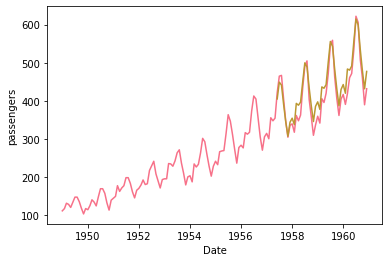

In [51]:
df.dropna()
sns.lineplot(data=df, x=df.index, y='passengers')
sns.lineplot(data=df, x=df.index, y='sarimaxPred')

In [52]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

27.666383553214548

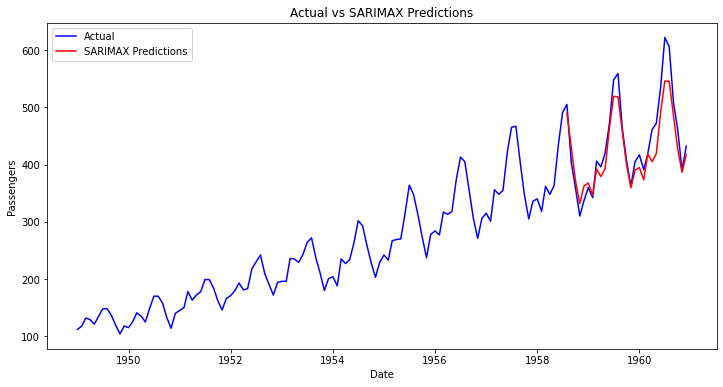

In [57]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df.index, df['passengers'], label='Actual', color='blue')

# Plot SARIMAX predictions
plt.plot(df.index, df['sarimaxPred'], label='SARIMAX Predictions', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Actual vs SARIMAX Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()

In [64]:
futureDates = pd.DataFrame(pd.date_range(start="1961-01-01", end="1964-01-01", freq='MS'), columns=['Dates'])
futureDates.set_index('Dates', inplace=True)
futureDates.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [66]:
model_fit.predict(start=futureDates.index[0], end=futureDates.index[-1]).plot()

<AxesSubplot:xlabel='Date', ylabel='passengers'>

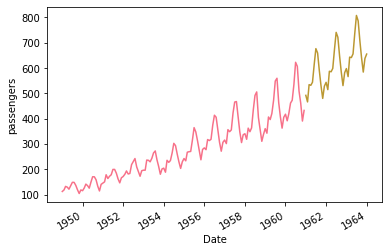

In [68]:
sns.lineplot(data=df, x=df.index, y='passengers')
model_fit.predict(start=futureDates.index[0], end=futureDates.index[-1]).plot()